In [ ]:
!apt-get update
!apt-get upgrade

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,830 kB]
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Test_Train_Detect


In [ ]:
!rm -rf darknet #Xóa thư mục darknet nếu có 
!git clone https://github.com/AlexeyAB/darknet #Tải model về Drive 

Cloning into 'darknet'...
remote: Enumerating objects: 15424, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 15424 (delta 0), reused 0 (delta 0), pack-reused 15423
Receiving objects: 100% (15424/15424), 14.05 MiB | 4.83 MiB/s, done.
Resolving deltas: 100% (10364/10364), done.
Checking out files: 100% (2050/2050), done.


In [ ]:
%cd ./darknet/

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Test_Train_Detect/darknet


In [ ]:
# !rm -rf data #Xóa thư mục data trong thư mục darknet 
!mkdir backup # tạo thư mục backup để lưu các file trọng số sau đào tạo 

#**Create train val test txt**

##**Copy to data in darknet**

In [ ]:
import os
import shutil

In [ ]:
# Copy data
print(os.getcwd())

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Test_Train_Detect/darknet


In [ ]:
%cd ./data

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Test_Train_Detect/darknet/data


In [ ]:
!ls

9k.tree     eagle.jpg	 imagenet.labels.list	   person.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  scream.jpg
coco.names  goal.txt	 labels			   voc.names
dog.jpg     horses.jpg	 openimages.names


In [ ]:
!mkdir train
!mkdir valid
!mkdir test

In [ ]:
def copy_all(path_copy_from, path_copy_to):
    lst_file = os.listdir(path_copy_from)
    for f in lst_file:
        f_from = os.path.join(path_copy_from, f)
        f_to = os.path.join(path_copy_to, f)
        shutil.copy(f_from, f_to)
        print(f"Copy {f}")

In [ ]:
# copy_all("/content/drive/MyDrive/Kỳ 2 - Năm 3/CS331_Nhóm/Datasets_Detect/Image/Train", "/content/drive/MyDrive/Kỳ 2 - Năm 3/CS331_Nhóm/Test_Train_Detect/darknet/data/train")

In [ ]:
# copy_all("/content/drive/MyDrive/Kỳ 2 - Năm 3/CS331_Nhóm/Datasets_Detect/Label/Train", "/content/drive/MyDrive/Kỳ 2 - Năm 3/CS331_Nhóm/Test_Train_Detect/darknet/data/train")

In [ ]:
# copy_all("/content/drive/MyDrive/Kỳ 2 - Năm 3/CS331_Nhóm/Datasets_Detect/Image/Validation", "/content/drive/MyDrive/Kỳ 2 - Năm 3/CS331_Nhóm/Test_Train_Detect/darknet/data/valid")

In [ ]:
# copy_all("/content/drive/MyDrive/Kỳ 2 - Năm 3/CS331_Nhóm/Datasets_Detect/Label/Validation", "/content/drive/MyDrive/Kỳ 2 - Năm 3/CS331_Nhóm/Test_Train_Detect/darknet/data/valid")

In [ ]:
# copy_all("/content/drive/MyDrive/Kỳ 2 - Năm 3/CS331_Nhóm/Datasets_Detect/Image/Test", "/content/drive/MyDrive/Kỳ 2 - Năm 3/CS331_Nhóm/Test_Train_Detect/darknet/data/test")

In [ ]:
# copy_all("/content/drive/MyDrive/Kỳ 2 - Năm 3/CS331_Nhóm/Datasets_Detect/Label/Test", "/content/drive/MyDrive/Kỳ 2 - Năm 3/CS331_Nhóm/Test_Train_Detect/darknet/data/test")

In [ ]:
!ls |wc -l

2096


##**Create txt**

train.txt

In [ ]:
import glob2

In [ ]:
%cd /content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet/data/train
path = "/content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet/data/train"

types = ('*.jpg', '*.png', '*.jpeg')
# path_txt = glob2.glob("*.txt")
path_img = list()
for type_ in types:
  path_img.extend(glob2.glob(type_))

with open("/content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet/train.txt","w") as f:
  for img in path_img:
    image_files = os.path.join(path, img)
    print(image_files)
    #tìm kiếm các file có đuôi dạng: png, jpeg, jpg trong thư mục
    if (os.path.exists(str(image_files[:-3]) + "txt")) or (os.path.exists(str(image_files[:-4]) + "txt")):
      f.write(image_files+'\n')
    #lưu tất cả các file vào biến files

valid.txt

In [ ]:
%cd /content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet/data/valid
path = "/content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet/data/valid"

types = ('*.jpg', '*.png', '*.jpeg')
# path_txt = glob2.glob("*.txt")
path_img = list()
for type_ in types:
  path_img.extend(glob2.glob(type_))

with open("/content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet/valid.txt","w") as f:
  for img in path_img:
    image_files = os.path.join(path, img)
    print(image_files)
    #tìm kiếm các file có đuôi dạng: png, jpeg, jpg trong thư mục
    if (os.path.exists(str(image_files[:-3]) + "txt")) or (os.path.exists(str(image_files[:-4]) + "txt")):
      f.write(image_files+'\n')
    #lưu tất cả các file vào biến files

test.txt

In [ ]:
%cd /content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet/data/test
path = "/content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet/data/test"

types = ('*.jpg', '*.png', '*.jpeg')
# path_txt = glob2.glob("*.txt")
path_img = list()
for type_ in types:
  path_img.extend(glob2.glob(type_))

with open("/content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet/test.txt","w") as f:
  for img in path_img:
    image_files = os.path.join(path, img)
    print(image_files)
    #tìm kiếm các file có đuôi dạng: png, jpeg, jpg trong thư mục
    if (os.path.exists(str(image_files[:-3]) + "txt")) or (os.path.exists(str(image_files[:-4]) + "txt")):
      f.write(image_files+'\n')
    #lưu tất cả các file vào biến files

#**Pre training**

Tạo yolo.names, yolo.data

In [ ]:
%cd /content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/g' Makefile

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Test_Train_Detect/darknet


In [ ]:
%cd /content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Test_Train_Detect/darknet


Tạo file cfg cho fast yolov2

#**Training**

In [2]:
%cd /content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet
!rm darknet
!make

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Test_Train_Detect/darknet
rm: cannot remove 'darknet': No such file or directory
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF obj/image_opencv.o obj/http_stream.o obj/gemm.o obj/utils.o obj/dark_cuda.o obj/convolutional_layer.o obj/list.o obj/image.o obj/activations.o obj/im2col.o obj/col2im.o obj/blas.o obj/crop_layer.o obj/dropout_layer.o obj/maxpool_layer.o obj/softmax_layer.o obj/data.o obj/matrix.o obj/network.o obj/connected_layer.o obj/cost_layer.o obj/parser.o obj/option_list.o obj/darknet.o obj/detection_layer.o obj/captcha.o obj/route_layer.o obj/writing.o obj/box.o obj/nightmare.o obj/normalizati

In [ ]:
%cd /content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet
!./darknet detector train yolo.data cfg/fast-yolov2.cfg -dont_show -map

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Region Avg IOU: 0.879632, Class: 1.000000, Obj: 0.881283, No Obj: 0.004448, Avg Recall: 1.000000,  count: 8
Region Avg IOU: 0.882076, Class: 1.000000, Obj: 0.889226, No Obj: 0.003579, Avg Recall: 1.000000,  count: 8
Region Avg IOU: 0.903040, Class: 1.000000, Obj: 0.894135, No Obj: 0.004308, Avg Recall: 1.000000,  count: 8
Region Avg IOU: 0.905184, Class: 1.000000, Obj: 0.888761, No Obj: 0.003884, Avg Recall: 1.000000,  count: 8

 (next mAP calculation at 5700 iterations) 

 Tensor Cores are used.
 Last accuracy mAP@0.50 = 100.00 %, best = 100.00 % ]2;5684/6000: loss=0.0 map=1.00 best=1.00 hours left=0.1
 5684: 0.008120, 0.011056 avg loss, 0.000010 rate, 0.412869 seconds, 363776 images, 0.099874 hours left
Loaded: 0.218786 seconds - performance bottleneck on CPU or Disk HDD/SSD
Region Avg IOU: 0.877915, Class: 1.000000, Obj: 0.876492, No Obj: 0.004279, Avg Recall: 1.000000,  count: 8
Region Avg IOU: 0.905633, Class: 1.000000, Ob

#**Predict a image file**

In [ ]:
%cd /content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet
!rm darknet
!make

In [6]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [4]:
%cd /content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Test_Train_Detect/darknet


In [5]:
# !./darknet detector test <path to .data file> <path to config> <path to weights> <path to image>  #chỉnh lại <path to image>
!./darknet detector test "/content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet/yolo.data" "/content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet/cfg/fast-yolov2.cfg" "/content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet/backup/fast-yolov2_best.weights" "/content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet/data/test/1163.jpg"


CUDA status Error: file: ./src/dark_cuda.c : () : line: 38 : build time: Jun 13 2022 - 15:57:46 

 CUDA Error: no CUDA-capable device is detected
Darknet error location: ./src/dark_cuda.c, check_error, line #69
CUDA Error: no CUDA-capable device is detected: Bad file descriptor


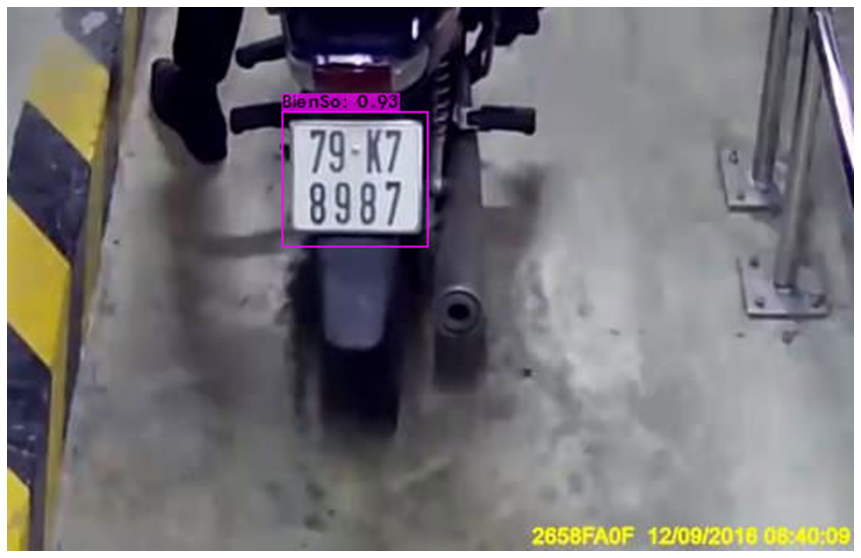

In [6]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test "/content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet/yolo.data" "/content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet/cfg/fast-yolov2.cfg" "/content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet/backup/fast-yolov2_best.weights" -dont_show -ext_output < test.txt > result_test.txt

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 -> 

#**Evaluation**

In [3]:
%cd /content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet
!rm darknet
!make

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Test_Train_Detect/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF obj/image_opencv.o obj/http_stream.o obj/gemm.o obj/utils.o obj/dark_cuda.o obj/convolutional_layer.o obj/list.o obj/image.o obj/activations.o obj/im2col.o obj/col2im.o obj/blas.o obj/crop_layer.o obj/dropout_layer.o obj/maxpool_layer.o obj/softmax_layer.o obj/data.o obj/matrix.o obj/network.o obj/connected_layer.o obj/cost_layer.o obj/parser.o obj/option_list.o obj/darknet.o obj/detection_layer.o obj/captcha.o obj/route_layer.o obj/writing.o obj/box.o obj/nightmare.o obj/normalization_layer.o obj/avgpool_layer.o obj/coco.o obj/dice.o ob

In [4]:
%cd /content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet
!./darknet detector map yolo.data cfg/fast-yolov2.cfg backup/fast-yolov2_best.weights

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Test_Train_Detect/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x 

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Test_Train_Detect/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x 

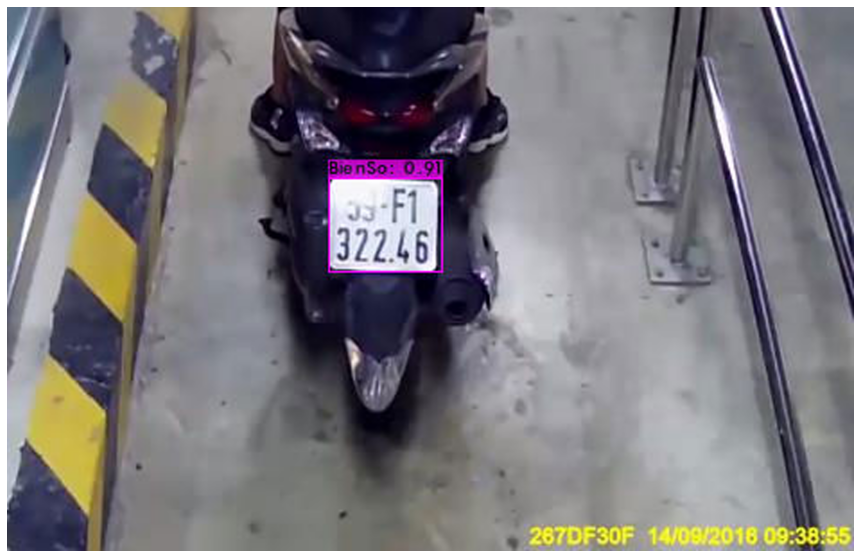

In [19]:
%cd /content/drive/MyDrive/CS331_Nhóm/Test_Train_Detect/darknet
!./darknet detector test yolo.data cfg/fast-yolov2.cfg backup/fast-yolov2_best.weights data/test/816.jpg

imShow('predictions.jpg')